## **Importing the Libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### Importing the dataset

In [ ]:
train=pd.read_excel('/content/train.xlsx')

Checking the top 5 rows of both train and test dataframe

In [ ]:
train.head()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18,target
0,-70,-61,-66,-53,-51,-63,-82,-57,-76,-78,-66,-66,-61,-59,-73,-75,-63,-77,B37
1,-77,-74,-71,-76,-65,-63,-66,-52,-55,-75,-72,-75,-74,-61,-64,-63,-53,-63,B61
2,-53,-38,-55,-66,-62,-62,-65,-70,-62,-52,-56,-53,-66,-68,-72,-60,-68,-77,A19
3,-72,-62,-59,-65,-65,-65,-78,-82,-83,-59,-84,-60,-64,-83,-69,-72,-95,-73,A22
4,-67,-69,-65,-63,-59,-53,-70,-72,-71,-60,-61,-57,-54,-76,-61,-66,-71,-80,A33


Checking the dimension of datasets

In [ ]:
train.shape

(36752, 19)

Getting the summary of dataset

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36752 entries, 0 to 36751
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   T1      36752 non-null  int64 
 1   T2      36752 non-null  int64 
 2   T3      36752 non-null  int64 
 3   T4      36752 non-null  int64 
 4   T5      36752 non-null  int64 
 5   T6      36752 non-null  int64 
 6   T7      36752 non-null  int64 
 7   T8      36752 non-null  int64 
 8   T9      36752 non-null  int64 
 9   T10     36752 non-null  int64 
 10  T11     36752 non-null  int64 
 11  T12     36752 non-null  int64 
 12  T13     36752 non-null  int64 
 13  T14     36752 non-null  int64 
 14  T15     36752 non-null  int64 
 15  T16     36752 non-null  int64 
 16  T17     36752 non-null  int64 
 17  T18     36752 non-null  int64 
 18  target  36752 non-null  object
dtypes: int64(18), object(1)
memory usage: 5.3+ MB


Checking for null values in the dataset

In [ ]:
print(train.isnull().sum())

T1        0
T2        0
T3        0
T4        0
T5        0
T6        0
T7        0
T8        0
T9        0
T10       0
T11       0
T12       0
T13       0
T14       0
T15       0
T16       0
T17       0
T18       0
target    0
dtype: int64


There are no null values in both train and test dataset

Checkung for duolicate values and dropping them off

In [ ]:
train.duplicated().sum()

1267

In [ ]:
train.drop_duplicates(keep='first',inplace=True)

In [ ]:
train.duplicated().sum()

0

Checking for unique values in target column of train dataset

In [ ]:
train['target'].nunique()

160

In [ ]:
train['target'].unique()

array(['B37', 'B61', 'A19', 'A22', 'A33', 'A75', 'A41', 'B14', 'B80',
       'B64', 'A1', 'B21', 'A70', 'B57', 'B9', 'B50', 'B31', 'A21', 'B30',
       'A4', 'B40', 'B6', 'A64', 'A25', 'B18', 'A66', 'A53', 'B73', 'A50',
       'B25', 'A29', 'A35', 'A3', 'A46', 'B45', 'A36', 'B5', 'A79', 'A32',
       'B23', 'A7', 'A62', 'A71', 'A58', 'A9', 'B63', 'B51', 'B8', 'B36',
       'A14', 'A15', 'A24', 'B38', 'A10', 'B4', 'A37', 'A12', 'B41',
       'A17', 'B49', 'B71', 'B59', 'B39', 'B29', 'A76', 'B58', 'B28',
       'A77', 'A67', 'B24', 'A31', 'A34', 'A5', 'B34', 'A11', 'B16',
       'B20', 'A63', 'B53', 'A73', 'A44', 'A69', 'A56', 'A54', 'A55',
       'B11', 'A42', 'B22', 'B67', 'A74', 'A57', 'A8', 'B46', 'B15',
       'A51', 'A40', 'A59', 'A72', 'B32', 'A2', 'A13', 'B17', 'A65',
       'A52', 'A47', 'B47', 'B77', 'B3', 'B35', 'B44', 'A80', 'B43',
       'B54', 'B75', 'A49', 'B52', 'B33', 'B2', 'B1', 'A39', 'B7', 'A20',
       'A18', 'B12', 'A27', 'A6', 'A68', 'B72', 'B66', 'B69', 'A26',
   

## Task 1 Create a clustering algorithm

In [ ]:
df=train.drop(columns=['target'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35485 entries, 0 to 36751
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   T1      35485 non-null  int64
 1   T2      35485 non-null  int64
 2   T3      35485 non-null  int64
 3   T4      35485 non-null  int64
 4   T5      35485 non-null  int64
 5   T6      35485 non-null  int64
 6   T7      35485 non-null  int64
 7   T8      35485 non-null  int64
 8   T9      35485 non-null  int64
 9   T10     35485 non-null  int64
 10  T11     35485 non-null  int64
 11  T12     35485 non-null  int64
 12  T13     35485 non-null  int64
 13  T14     35485 non-null  int64
 14  T15     35485 non-null  int64
 15  T16     35485 non-null  int64
 16  T17     35485 non-null  int64
 17  T18     35485 non-null  int64
dtypes: int64(18)
memory usage: 5.1 MB


In [ ]:
df.describe()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18
count,35485.000000,35485.000000,35485.000000,35485.000000,35485.000000,35485.000000,35485.000000,35485.000000,35485.000000,35485.000000,35485.00000,35485.000000,35485.000000,35485.000000,35485.000000,35485.000000,35485.000000,35485.000000
mean,-65.673609,-64.521460,-64.522221,-65.147302,-64.299930,-63.348852,-66.913034,-66.426913,-65.483669,-65.456531,-65.56855,-66.056080,-63.954375,-64.177399,-64.467465,-64.130900,-65.805467,-66.434832
std,8.585968,8.955206,8.198714,7.982390,7.840998,8.641638,9.194365,10.007338,10.433413,10.336335,9.26462,8.686109,8.222616,9.291913,8.984151,10.499997,9.910159,10.350422
min,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.00000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000
25%,-72.000000,-70.000000,-70.000000,-70.000000,-69.000000,-69.000000,-74.000000,-74.000000,-73.000000,-73.000000,-71.00000,-71.000000,-69.000000,-70.000000,-70.000000,-71.000000,-72.000000,-73.000000
50%,-66.000000,-65.000000,-64.000000,-66.000000,-65.000000,-63.000000,-66.000000,-66.000000,-65.000000,-65.000000,-65.00000,-65.000000,-63.000000,-63.000000,-65.000000,-63.000000,-65.000000,-66.000000
75%,-61.000000,-59.000000,-59.000000,-61.000000,-59.000000,-57.000000,-60.000000,-59.000000,-58.000000,-58.000000,-59.00000,-61.000000,-58.000000,-58.000000,-58.000000,-57.000000,-59.000000,-59.000000
max,-41.000000,-37.000000,-41.000000,-39.000000,-36.000000,-39.000000,-45.000000,-39.000000,-39.000000,-37.000000,-40.00000,-43.000000,-43.000000,-39.000000,-38.000000,-40.000000,-43.000000,-39.000000


In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df_scaled = sc.fit_transform(df)
df_scaled

array([[-0.50389802,  0.39323599, -0.18024781, ..., -1.0351672 ,
         0.283094  , -1.02076201],
       [-1.3191932 , -1.05845399, -0.79010815, ...,  0.10770634,
         1.29217375,  0.33185894],
       [ 1.47610458,  2.96161056,  1.16144496, ...,  0.39342473,
        -0.22144587, -1.02076201],
       ...,
       [ 2.75728273,  0.72824137, -0.91208022, ..., -0.55896989,
        -0.9278017 , -0.73091466],
       [ 1.8255168 ,  1.62158904, -0.66813608, ..., -0.93992774,
        -0.62507777, -1.40722514],
       [-0.03801505,  0.05823061, -0.66813608, ...,  0.29818527,
        -0.1205379 ,  0.13862738]])

In [ ]:
df_scaled=pd.DataFrame(df_scaled)
df_scaled

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-0.503898,0.393236,-0.180248,1.521784,1.696227,0.040369,-1.640916,0.942013,-1.007962,-1.213549,-0.046570,0.006456,0.359304,0.557202,-0.949745,-1.035167,0.283094,-1.020762
1,-1.319193,-1.058454,-0.790108,-1.359599,-0.089285,0.040369,0.099305,1.441654,1.004831,-0.923306,-0.694204,-1.029695,-1.221724,0.341958,0.052033,0.107706,1.292174,0.331859
2,1.476105,2.961611,1.161445,-0.106824,0.293325,0.156090,0.208069,-0.357052,0.333900,1.301885,1.032820,1.503120,-0.248784,-0.411396,-0.838437,0.393425,-0.221446,-1.020762
3,-0.736839,0.281568,0.673557,0.018454,-0.089285,-0.191072,-1.205861,-1.556189,-1.678892,0.624653,-1.989473,0.697224,-0.005549,-2.025726,-0.504511,-0.749449,-2.945961,-0.634299
4,-0.154486,-0.500112,-0.058276,0.269009,0.675935,1.197574,-0.335750,-0.556908,-0.528725,0.527905,0.493125,1.042608,1.210626,-1.272372,0.385959,-0.178012,-0.524170,-1.310609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35480,-0.270957,0.281568,0.063696,0.770119,0.675935,-0.885394,-0.009459,-0.656836,-0.720420,-0.342822,-0.586265,-1.029695,0.967391,-0.411396,-0.393202,-1.035167,-0.927802,-2.759846
35481,1.126692,1.621589,0.917501,1.897617,0.675935,0.387531,0.534360,-0.257124,0.717289,0.140916,1.788393,0.582096,0.724156,0.880068,0.497268,0.583904,0.686726,0.235243
35482,2.757283,0.728241,-0.912080,-0.607934,-1.364650,-1.001115,-0.988333,-1.756045,-1.774740,0.624653,0.061369,-0.223800,-0.127166,-1.810482,-2.396758,-0.558970,-0.927802,-0.730915
35483,1.825517,1.621589,-0.668136,0.143731,0.038252,-0.538233,-0.118223,-0.656836,-1.295503,0.721400,0.493125,-0.799439,-0.370401,-1.379994,-0.949745,-0.939928,-0.625078,-1.407225


In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(df_scaled)

cum_explained_variance = np.cumsum(pca.explained_variance_ratio_)

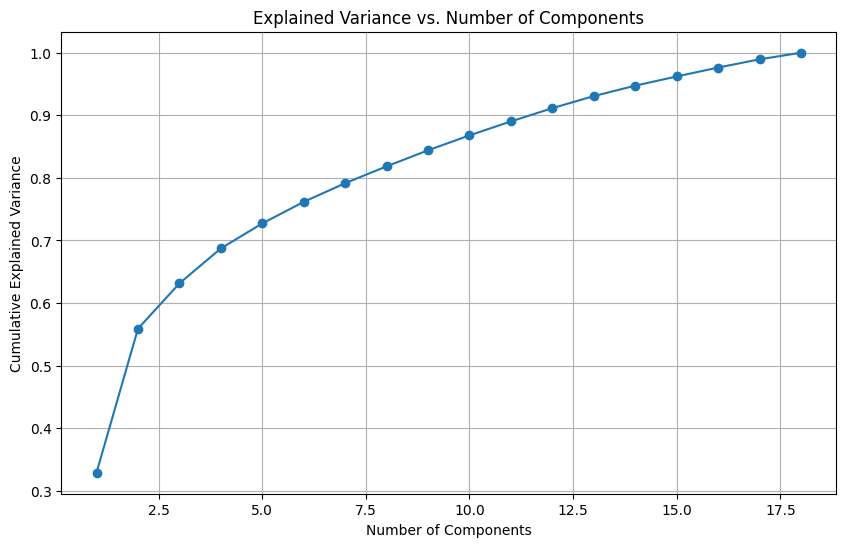

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cum_explained_variance) + 1), cum_explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

In [ ]:
n_components = np.argmax(cum_explained_variance >= 0.95) + 1
print(f"Number of components explaining at least 95% variance: {n_components}")

Number of components explaining at least 95% variance: 15


In [ ]:
pca1=PCA(n_components=3)
df_scaled=pca1.fit_transform(df_scaled)

In [ ]:
df_scaled.shape

(35485, 3)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertia=[]
k_range=(2,15)
for k in k_range:
   km = KMeans(n_clusters=k,random_state=42)
   km.fit(df_scaled)
   inertia.append(km.inertia_)

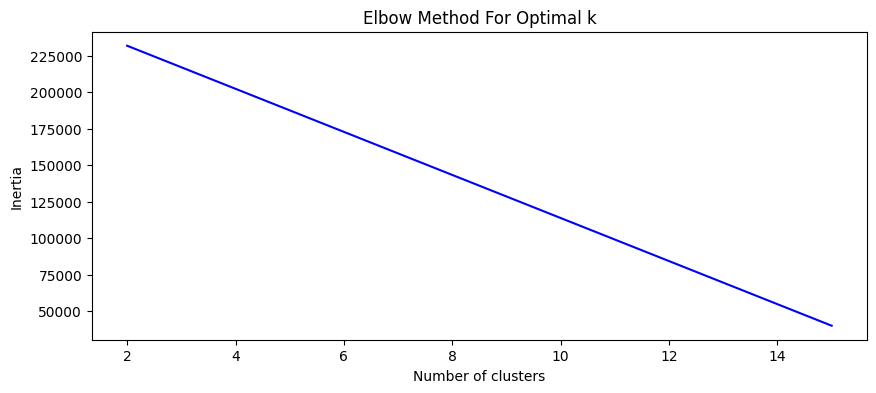

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(k_range, inertia,color='blue')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
km1=KMeans(n_clusters=5)
pred=km1.fit_predict(df_scaled)

silhouette_score(df_scaled,pred)

0.3773545268909

In [ ]:
df_scaled=pd.DataFrame(df_scaled)
df_scaled['cluster']=km1.labels_
df_scaled

,0,1,2,cluster
0,0.581172,-0.295563,1.984553,4
1,-2.869851,1.894629,-0.444196,0
2,2.552720,-2.018120,-1.909396,2
3,3.157251,1.601176,2.263123,1
4,1.429987,-1.035078,1.390095,4
...,...,...,...,...
35480,1.784769,0.693163,2.372918,4
35481,0.316249,-3.337709,-0.717632,2
35482,4.139749,2.079730,-1.292944,1
35483,3.056582,0.674464,-0.500696,1
